## TODO:

1. Place the Advertising.csv into /data folder
download it from http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv


2. Quick Analysis and Visualization


3. Train linear regression model


4. Show the Learned estimators/coeficients 


5. Model Evaluation


6. Feature Selection

In [1]:
import numpy as np

import pandas as pd

data_path = "data/Advertising.csv"

# or load the dataset directly from the link
# # data_link = "http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv"

data = pd.read_csv(data_path, index_col=0)

In [2]:
# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Visualizing data

- For visualization purpose let's use seaborn as it is simple to use statistical visualization library and it's build on top of matplotlib.

In [3]:
import seaborn as sns

# allow plots to appear within the notebook
%matplotlib inline

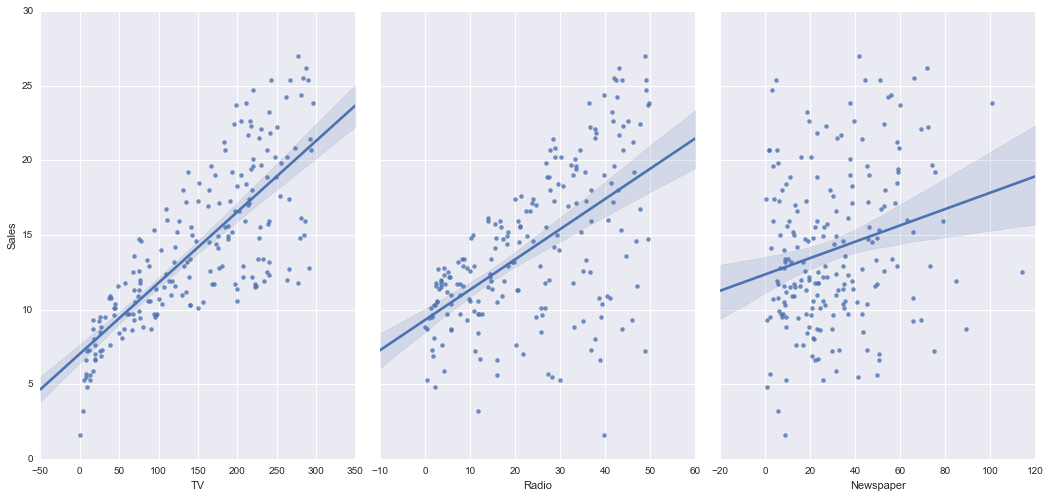

In [4]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=7, aspect=0.7, kind='reg')

# Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In [5]:
# feature names
feature_names = ['TV', 'Radio', 'Newspaper']

In [6]:
# matrix training instances
X = data[feature_names]

# target output
label = 'Sales'
y = data[label]

In [7]:
print(X.head())
print('-------------------------')
print(y.head())

      TV  Radio  Newspaper
1  230.1   37.8       69.2
2   44.5   39.3       45.1
3   17.2   45.9       69.3
4  151.5   41.3       58.5
5  180.8   10.8       58.4
-------------------------
1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64


In [8]:
# How many training examples do we got?
# (row, col) -> (number of training examples, number of variables/features)
X.shape

(200, 3)

In [9]:
# Splitting X and y into training and testing sets
from sklearn.model_selection import train_test_split

# As we are spliting data randomly,
# We use random_state=1 for reproducibility of this kernel results on your machine
# otherwise you would get differnt coeficients
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [10]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150L,)
(50, 3)
(50L,)


In [11]:
# Linear Regression Model

# import model
from sklearn.linear_model import LinearRegression

# import module to calculate model perfomance metrics
from sklearn import metrics

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [13]:
# pair the feature names with the coefficients
list(zip(feature_names, linreg.coef_))

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088836),
 ('Newspaper', 0.0034504647111804065)]

## The Learned Linear Function is:

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

In [14]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

### Compute RMSE

In [15]:
# We want to compute the RMSQ using the true testing(y) and our predicted(Y)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


### TIP:

- Error is something we want to minimize, so a lower number for RMSE is better. 
- If we wanted to make changes and improvements to a model, the RMSE should be smaller if the model is getting better.

## Experiment

### Feature selection

- Does **Newspaper** it improve the quality of our predictions?


- **Hypothesis:** **Newspaper** does not improve model predictions


- **Testing:** Let's **remove it** from the model and check the RMSE!

In [16]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


### Question

First we got RMSE of 1.40 but after removing Newspapper we got 1.38, What does it mean?

### Get In Touch

just in case of doubt or you want to share your answer with me Tweet me on https://twitter.com/fumodavi
or email me on coder.davidfumo@gmail.com